In [1]:
import numpy as np
import torch

In [2]:
dir_path = '/home/sci/nawazish.khan/non-linear-ssm-experiments/supershapes/pytorch-model-NewRun-0-realnvp-non_zero_mean_anisotropic-FullSS/'

In [3]:
cov =  torch.from_numpy(np.load(f'{dir_path}/cov.npy')).float()
eigvalsH =  torch.from_numpy(np.load(f'{dir_path}/eigvalsh.npy')).float()
eigvalsP =  torch.from_numpy(np.load(f'{dir_path}/eigvals.npy')).float()

In [4]:
print(f'{eigvalsP.shape} {eigvalsH.shape}')

torch.Size([3072]) torch.Size([3072])


In [29]:
modes_retained = 0.99

In [30]:
eigvalsP_, _ = eigvalsP.sort(descending=True)
eigvals = eigvalsP_
q = torch.cumsum(eigvals, dim=0)/eigvals.sum(0)

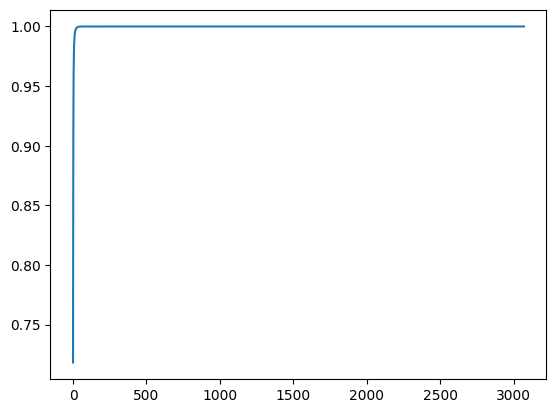

In [31]:
import matplotlib.pyplot as plt

plt.plot(np.arange(q.shape[0]), q.numpy())
plt.show()

In [42]:
q[0:30]

tensor([0.7183, 0.8647, 0.9062, 0.9387, 0.9591, 0.9705, 0.9774, 0.9827, 0.9862,
        0.9890, 0.9914, 0.9928, 0.9940, 0.9949, 0.9956, 0.9962, 0.9966, 0.9970,
        0.9973, 0.9977, 0.9980, 0.9982, 0.9984, 0.9986, 0.9988, 0.9989, 0.9991,
        0.9992, 0.9993, 0.9994])

In [32]:
indices_retained  = ((torch.cumsum(eigvals, dim=0)/eigvals.sum(0)) <= modes_retained).float()
indices_retained.sum(0)

tensor(10.)

In [33]:
indices_excluded = ((torch.cumsum(eigvals, dim=0)/eigvals.sum(0)) > modes_retained).float()
indices_excluded.sum(0)

tensor(3062.)

In [34]:
remaining_var = ((indices_excluded * eigvals).sum())/indices_excluded.sum()
remaining_var

tensor(0.0946)

In [35]:
eigvals

tensor([ 1.8948e+04,  3.8629e+03,  1.0948e+03,  ..., -1.5863e-04,
        -1.6137e-04, -1.6495e-04])

In [36]:
eigvals_in = indices_retained * eigvals
eigvals_in

tensor([18948.0273,  3862.8525,  1094.7761,  ...,    -0.0000,    -0.0000,
           -0.0000])

In [37]:
eigvals_out = indices_excluded * remaining_var
eigvals_out

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0946, 0.0946, 0.0946])

In [40]:
eigvals_all = eigvals_in + eigvals_out
eigvals_all[0:20]

tensor([1.8948e+04, 3.8629e+03, 1.0948e+03, 8.5693e+02, 5.3919e+02, 2.9896e+02,
        1.8372e+02, 1.3967e+02, 9.3092e+01, 7.3177e+01, 9.4579e-02, 9.4579e-02,
        9.4579e-02, 9.4579e-02, 9.4579e-02, 9.4579e-02, 9.4579e-02, 9.4579e-02,
        9.4579e-02, 9.4579e-02])